In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

Plot the training losses for the PBE0 and SCAN pre-trained networks.

In [7]:
td = '/home/awills/Documents/Research2/xcquinox_pt'
xcs = ['pbe0', 'scan']
netdirs = sorted([i for i in os.listdir(os.path.join(td,'pbe0')) if os.path.isdir(os.path.join(td, 'pbe0', i))])

In [8]:
netdirs

['c_3_16_mgga',
 'c_3_16_nl',
 'c_3_32_mgga',
 'c_3_32_nl',
 'x_3_16_mgga',
 'x_3_16_nl',
 'x_3_32_mgga',
 'x_3_32_nl']

(1000, 2)
(1000, 2)
(1000, 2)
(1649, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1393, 2)
not found:  /home/awills/Documents/Research2/xcquinox_pt pbe0 x_3_16_mgga
not found:  /home/awills/Documents/Research2/xcquinox_pt scan x_3_16_mgga
(1000, 2)
(1379, 2)
not found:  /home/awills/Documents/Research2/xcquinox_pt pbe0 x_3_32_mgga
not found:  /home/awills/Documents/Research2/xcquinox_pt scan x_3_32_mgga
(1000, 2)
(1453, 2)


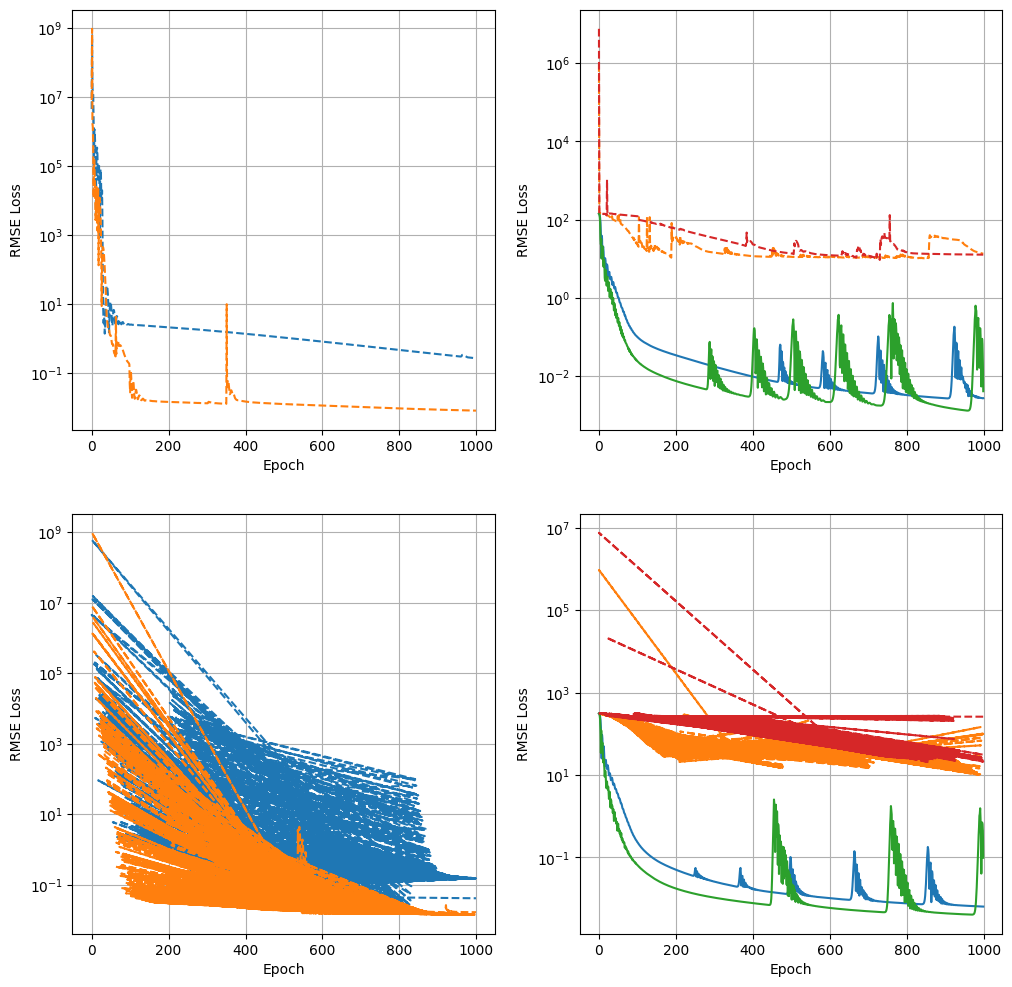

In [28]:
f = plt.figure(figsize=(12,12))
axpx = f.add_subplot(221)
axpc = f.add_subplot(222)
axsx = f.add_subplot(223)
axsc = f.add_subplot(224)

axs = [axpx,axpc,axsx,axsc]

lss = {'mgga':'-',
       'nl':'--'}

for ax in axs:
    ax.grid()
    ax.set_xlabel('Epoch')
    ax.set_ylabel('RMSE Loss')
    ax.set_yscale('log')

for nd in netdirs:
    for ixc, xc in enumerate(xcs):
        try:
            loss = pd.read_csv(os.path.join(td, xc, nd, 'ptlog.dat'), delimiter='\t')
            print(loss.shape)
        except:
            print('not found: ', td, xc, nd)
            continue
        ls = lss[nd.split('_')[-1]]
        if xc == 'pbe0':
            if nd[0] == 'x':
                ax = axpx
            elif nd[0] == 'c':
                ax = axpc
        elif xc == 'scan':
            if nd[0] == 'x':
                ax = axsx
            elif nd[0] == 'c':
                ax = axsc
    
        ax.plot(loss['#Epoch'], loss['Loss'], ls=ls)


In [17]:
loss

,#Epoch,Loss
0,547,1.582324e-02
1,548,1.581950e-02
2,0,8.155233e+06
3,549,1.581554e-02
4,1,9.460400e+08
...,...,...
1448,995,1.682594e-02
1449,996,1.682291e-02
1450,997,1.681823e-02
1451,998,1.681486e-02


In [18]:
loss[-1000:]

,#Epoch,Loss
453,771,0.015302
454,229,0.265073
455,772,0.015300
456,230,0.340636
457,773,0.015298
...,...,...
1448,995,0.016826
1449,996,0.016823
1450,997,0.016818
1451,998,0.016815


In [23]:
loss

,#Epoch,Loss
0,547,1.582324e-02
1,548,1.581950e-02
2,0,8.155233e+06
3,549,1.581554e-02
4,1,9.460400e+08
...,...,...
1448,995,1.682594e-02
1449,996,1.682291e-02
1450,997,1.681823e-02
1451,998,1.681486e-02


In [24]:
loss.iloc[-1000:]

,#Epoch,Loss
453,771,0.015302
454,229,0.265073
455,772,0.015300
456,230,0.340636
457,773,0.015298
...,...,...
1448,995,0.016826
1449,996,0.016823
1450,997,0.016818
1451,998,0.016815
